Environment setup stuff. Load libraries required, read CSV files, etc. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from pandas import set_option
set_option("display.max_rows", 25)
from IPython.core.display import HTML

LARGE_FIGSIZE = (16, 12)


Read each file into variables:


In [2]:
bahamas_address      = pd.read_csv("data/bahamas_leaks.nodes.address.csv",low_memory=False)
bahamas_edges        = pd.read_csv("data/bahamas_leaks.edges.csv",low_memory=False)
bahamas_entity       = pd.read_csv("data/bahamas_leaks.nodes.entity.csv",low_memory=False)
bahamas_intermediary = pd.read_csv("data/bahamas_leaks.nodes.intermediary.csv",low_memory=False)
bahamas_officer      = pd.read_csv("data/bahamas_leaks.nodes.officer.csv",low_memory=False)

To get an overview of the data structure:

In [3]:
# load into a dictionary where the key corresponds to the source file and the value is listing of columns in the CSV file

bahamas_data = {'1. entities' : pd.Series(bahamas_entity.columns.values),
            '2. intermediaries' : pd.Series(bahamas_intermediary.columns.values),
            '3. officers': pd.Series(bahamas_officer.columns.values),
            '4. addresses' : pd.Series(bahamas_address.columns.values),
            '5. all_edges': pd.Series(bahamas_edges.columns.values)}

# load dictionary into a DataFrame and display the first 20 entries
bahamas_overview = pd.DataFrame(bahamas_data)
bahamas_overview.head(20)


,1. entities,2. intermediaries,3. officers,4. addresses,5. all_edges
0,labels(n),labels(n),labels(n),labels(n),node_1
1,valid_until,valid_until,valid_until,valid_until,rel_type
2,country_codes,country_codes,country_codes,country_codes,node_2
3,countries,countries,countries,countries,sourceID
4,node_id,node_id,node_id,node_id,valid_until
5,sourceID,sourceID,sourceID,sourceID,start_date
6,address,address,address,address,end_date
7,name,name,name,name,NaN
8,jurisdiction_description,jurisdiction_description,jurisdiction_description,jurisdiction_description,NaN
9,service_provider,service_provider,service_provider,service_provider,NaN


Sample command to get the record count and number of columns for each CSV

In [4]:
bahamas_address.shape

(551, 18)

   # BAHAMAS PAPERS 
   

Text(0,0.5,'Count of country')

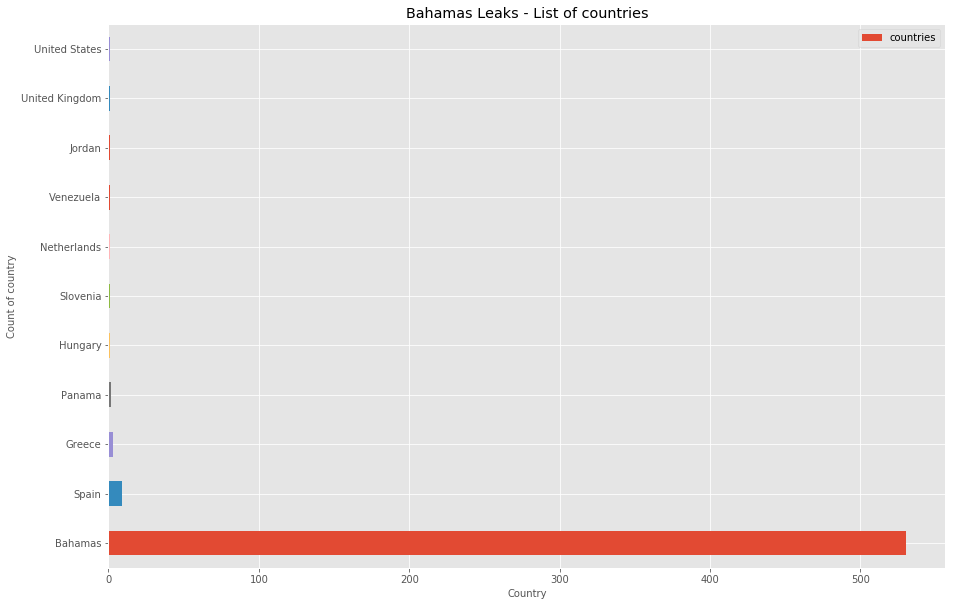

In [5]:
df1 = bahamas_address.countries.value_counts()
ax = df1.plot(kind='barh', title ="Bahamas Leaks - List of countries",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Country",fontsize=10)
ax.set_ylabel("Count of country",fontsize=10)

Text(0,0.5,'Count per country')

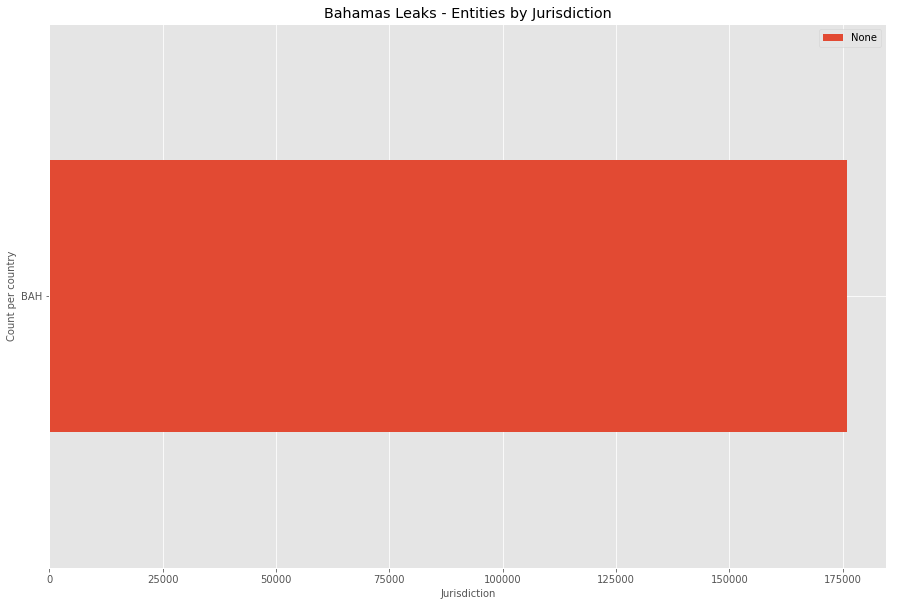

In [6]:
df3 = bahamas_entity.groupby(['jurisdiction']).size()
ax = df3[:3].plot(kind='barh', title ="Bahamas Leaks - Entities by Jurisdiction",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Jurisdiction",fontsize=10)
ax.set_ylabel("Count per country",fontsize=10)

Text(0,0.5,'Count of Relationship')

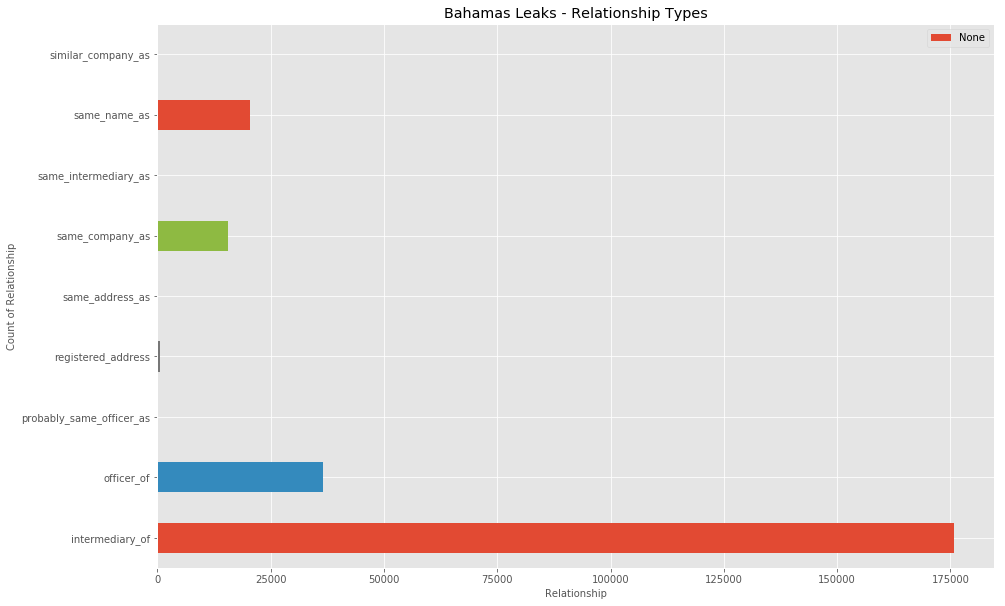

In [7]:
df2 = bahamas_edges.groupby(['rel_type']).size()
ax = df2.plot(kind='barh', title ="Bahamas Leaks - Relationship Types",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Relationship",fontsize=10)
ax.set_ylabel("Count of Relationship",fontsize=10)

Identify which companies are being used as intermediaries

In [8]:
df1 = bahamas_edges.node_1.value_counts()
df2 = pd.DataFrame({'node_id':df1.index, 'count':df1.values})
df3 = bahamas_intermediary[[u'node_id', u'name']]
df4 = pd.merge(df2, df3, on='node_id')

Text(0,0.5,'Count of companies using intermediary')

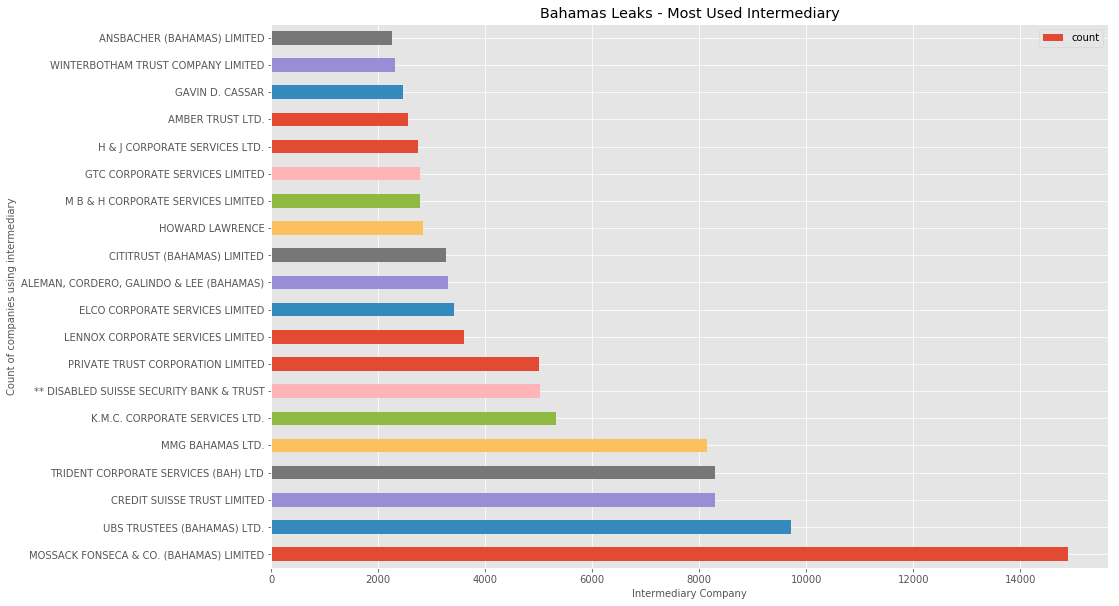

In [9]:
ax = df4[:20].plot(x='name', y='count', kind='barh', title ="Bahamas Leaks - Most Used Intermediary",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Intermediary Company",fontsize=10)
ax.set_ylabel("Count of companies using intermediary",fontsize=10)



# OFFSHORE LEAKS

In [10]:
offshore_address      = pd.read_csv("data/offshore_leaks.nodes.address.csv",low_memory=False)
offshore_edges        = pd.read_csv("data/offshore_leaks.edges.csv",low_memory=False)
offshore_entity       = pd.read_csv("data/offshore_leaks.nodes.entity.csv",low_memory=False)
offshore_intermediary = pd.read_csv("data/offshore_leaks.nodes.intermediary.csv",low_memory=False)
offshore_officer      = pd.read_csv("data/offshore_leaks.nodes.officer.csv",low_memory=False)

Text(0,0.5,'Count of companies')

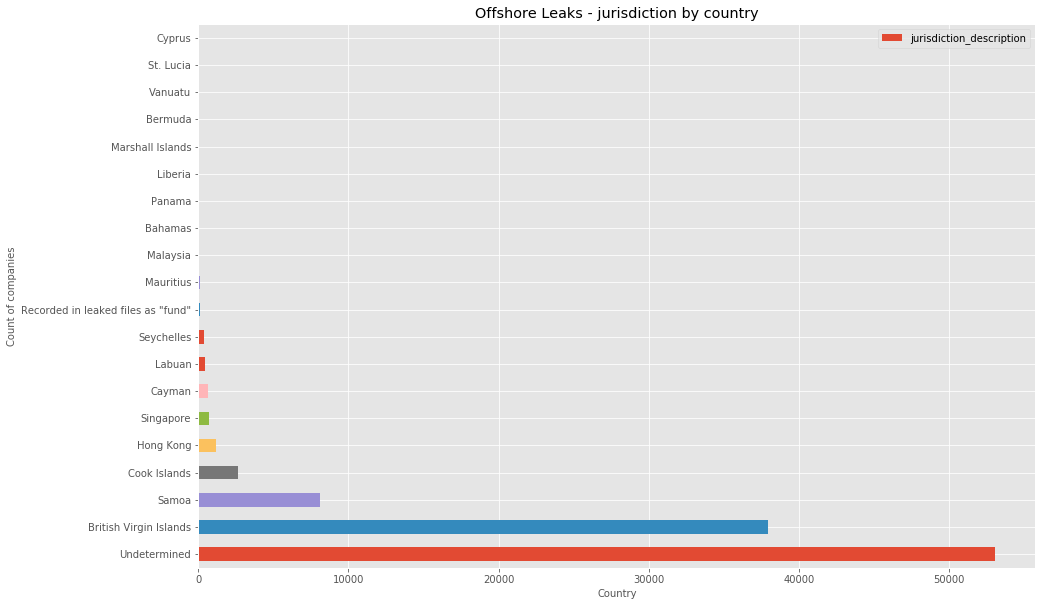

In [11]:
df1 = offshore_entity.jurisdiction_description.value_counts()
ax = df1[:20].plot(kind='barh', title ="Offshore Leaks - jurisdiction by country",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Country",fontsize=10)
ax.set_ylabel("Count of companies",fontsize=10)

In [12]:
offshore_subset = offshore_entity[[u'node_id', u'name', u'jurisdiction_description', u'countries']]
#offshore_subset.head()
split = lambda x: pd.Series([i for i in reversed(x.split(';'))])
offshore_split = offshore_subset['countries'].dropna().apply(split)
offshore_split.rename(columns={0:'Country1',1:'Country2',2:'Country3', 3: 'Country4'},inplace=True)
offshore_split = offshore_split[['Country1', 'Country2', 'Country3', 'Country4']]
offshore_split[:5]

,Country1,Country2,Country3,Country4
0,Cyprus,British Virgin Islands,NaN,NaN
1,British Virgin Islands,Not identified,NaN,NaN
2,British Virgin Islands,Singapore,NaN,NaN
3,British Virgin Islands,Cyprus,NaN,NaN
4,Not identified,United States,NaN,NaN


In [13]:
#Dropping two columns and merging this back to the main dataframe, and then dropping the country_codes column
offshore_split.drop(['Country3', 'Country4'], axis = 1)
offshore_subset[['Country1', 'Country2']] = offshore_split[['Country1', 'Country2']]
offshore_subset = offshore_subset.drop('countries', axis = 1)
offshore_subset.head()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,node_id,name,jurisdiction_description,Country1,Country2
0,67028,ZODIAK LTD,Undetermined,Cyprus,British Virgin Islands
1,67243,Zven Ltd.,Undetermined,British Virgin Islands,Not identified
2,67258,Anson 11A Ltd.,Undetermined,British Virgin Islands,Singapore
3,67266,GIADA LTD,Undetermined,British Virgin Islands,Cyprus
4,108050,Scott D. Howard,Undetermined,Not identified,United States


In [14]:
source_country = offshore_subset[['Country1','Country2']]
rank_offshore = source_country.apply(pd.Series.value_counts).fillna(0)
rank_offshore
rank_offshore['total'] = rank_offshore.sum(axis = 1)
rank_offshore = rank_offshore.sort_values(by = 'total', ascending = False).total
top_20 = rank_offshore[:20]

Text(0,0.5,'Count of Companies in Country')

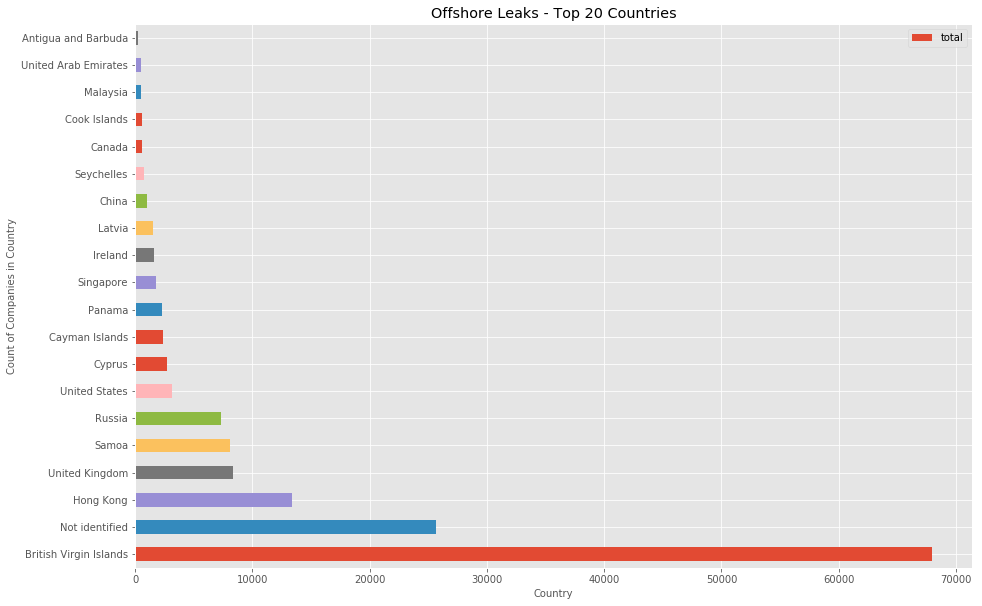

In [15]:
ax = top_20.plot(kind='barh', title ="Offshore Leaks - Top 20 Countries",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Country",fontsize=10)
ax.set_ylabel("Count of Companies in Country",fontsize=10)

Text(0,0.5,'Count of Relationship')

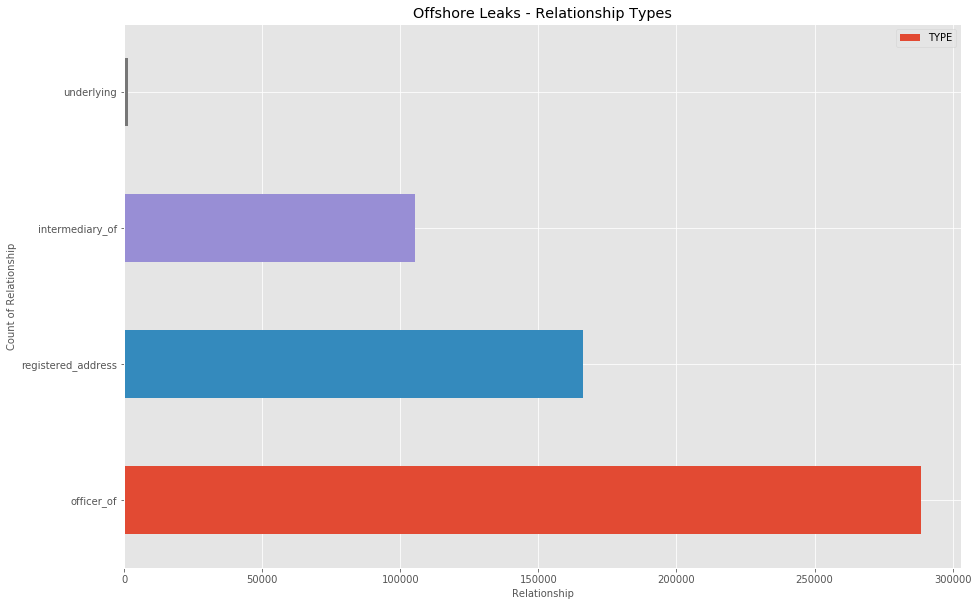

In [16]:
df2 = offshore_edges.TYPE.value_counts()
ax = df2.plot(kind='barh', title ="Offshore Leaks - Relationship Types",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Relationship",fontsize=10)
ax.set_ylabel("Count of Relationship",fontsize=10)

Text(0,0.5,'Officer')

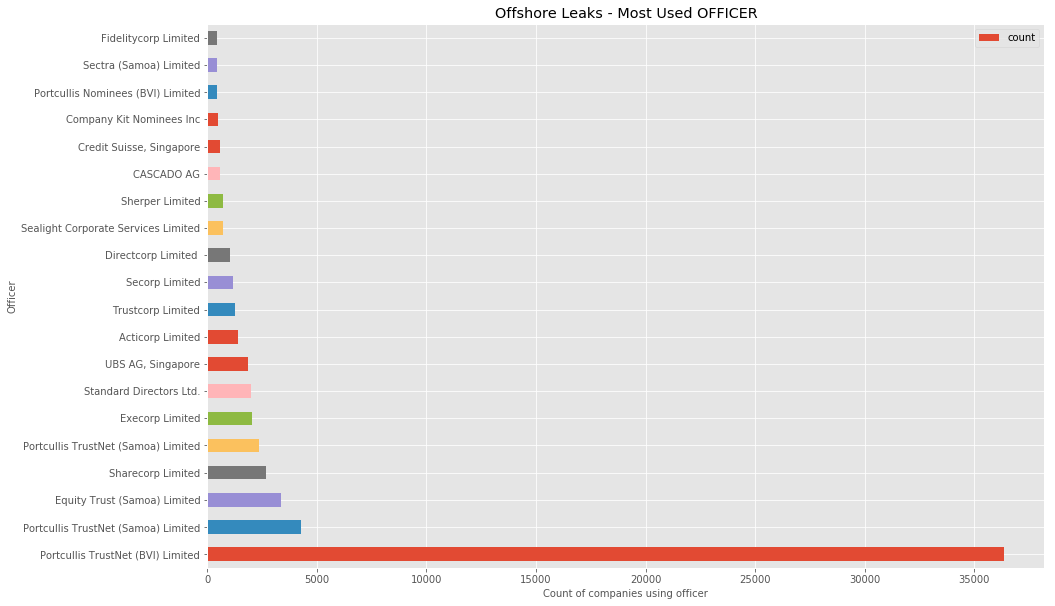

In [17]:

df1 = offshore_edges.START_ID.value_counts()
df2 = pd.DataFrame({'node_id':df1.index, 'count':df1.values})
df3 = offshore_officer[[u'node_id', u'name']]
df4 = pd.merge(df2, df3, on='node_id')
ax = df4[:20].plot(x='name', y='count', kind='barh', title ="Offshore Leaks - Most Used OFFICER",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Count of companies using officer",fontsize=10)
ax.set_ylabel("Officer",fontsize=10)



## PANAMA PAPERS

In [18]:
panama_address      = pd.read_csv("data/panama_papers.nodes.address.csv",low_memory=False)
panama_edges        = pd.read_csv("data/panama_papers.edges.csv",low_memory=False)
panama_entity       = pd.read_csv("data/panama_papers.nodes.entity.csv",low_memory=False)
panama_intermediary = pd.read_csv("data/panama_papers.nodes.intermediary.csv",low_memory=False)
panama_officer      = pd.read_csv("data/panama_papers.nodes.officer.csv",low_memory=False)

Text(0,0.5,'Count of companies')

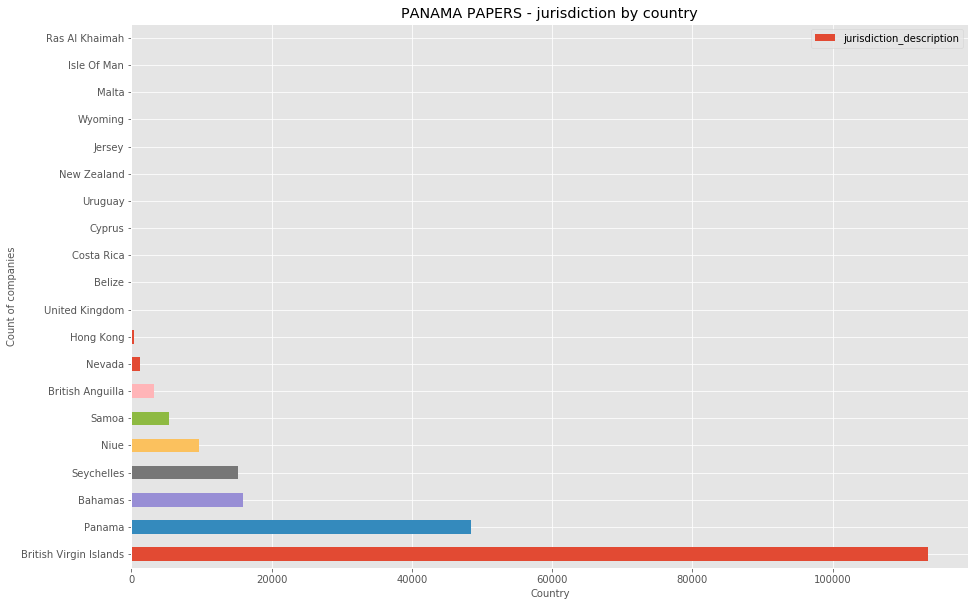

In [19]:
df1 = panama_entity.jurisdiction_description.value_counts()
ax = df1[:20].plot(kind='barh', title ="PANAMA PAPERS - jurisdiction by country",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Country",fontsize=10)
ax.set_ylabel("Count of companies",fontsize=10)

In [20]:
panama_subset = panama_entity[[u'node_id', u'name', u'jurisdiction_description', u'countries']]
panama_subset.head()
split = lambda x: pd.Series([i for i in reversed(x.split(';'))])
panama_split = panama_subset['countries'].dropna().apply(split)
panama_split.rename(columns={0:'Country1'},inplace=True)
panama_split = panama_split[['Country1']]
panama_split[:5]

,Country1
0,Hong Kong
1,Hong Kong
2,Hong Kong
3,Hong Kong
4,Hong Kong


In [21]:
#Dropping two columns and merging this back to the main dataframe, and then dropping the country_codes column
#panama_split.drop(['Country3', 'Country4'], axis = 1)
panama_subset[['Country1']] = panama_split[['Country1']]
panama_subset = panama_subset.drop('countries', axis = 1)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [22]:
source_country = panama_subset[['Country1']]
rank_panama = source_country.apply(pd.Series.value_counts).fillna(0)
rank_panama
rank_panama['total'] = rank_panama.sum(axis = 1)
rank_panama = rank_panama.sort_values(by = 'total', ascending = False).total

Text(0,0.5,'Count of Companies in Country')

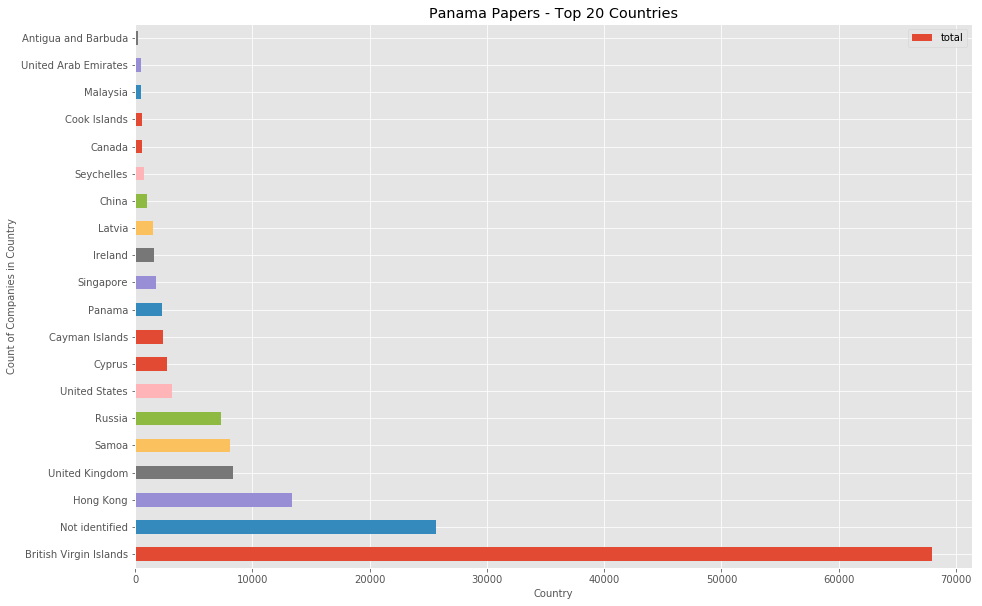

In [23]:
ax = top_20.plot(kind='barh', title ="Panama Papers - Top 20 Countries",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Country",fontsize=10)
ax.set_ylabel("Count of Companies in Country",fontsize=10)

Text(0,0.5,'Count of Relationship')

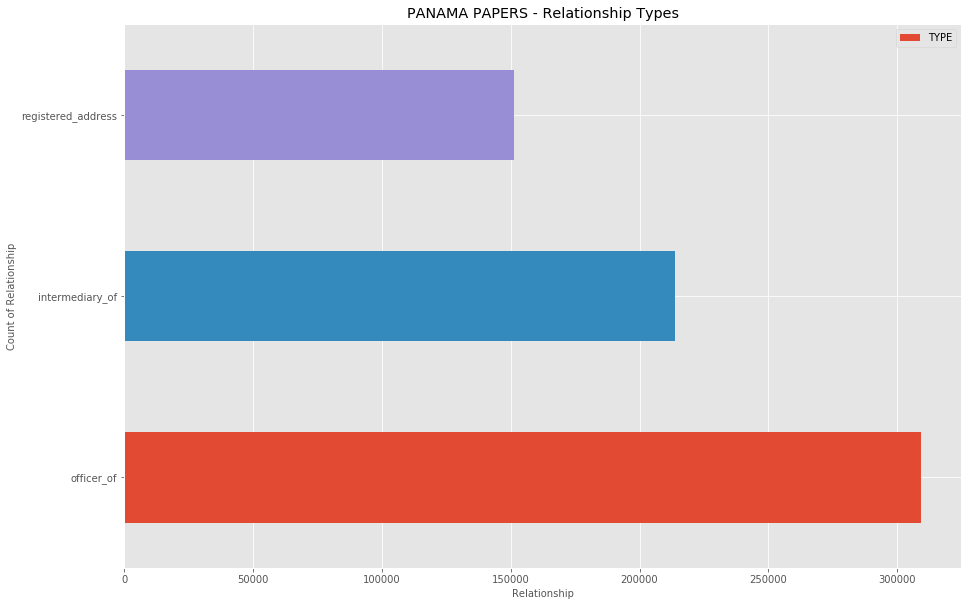

In [24]:
df2 = panama_edges.TYPE.value_counts()
ax = df2.plot(kind='barh', title ="PANAMA PAPERS - Relationship Types",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Relationship",fontsize=10)
ax.set_ylabel("Count of Relationship",fontsize=10)

## PARADISE PAPERS

In [25]:
paradise_address      = pd.read_csv("data/paradise_papers.nodes.address.csv",low_memory=False)
paradise_edges        = pd.read_csv("data/paradise_papers.edges.csv",low_memory=False)
paradise_entity       = pd.read_csv("data/paradise_papers.nodes.entity.csv",low_memory=False)
paradise_intermediary = pd.read_csv("data/paradise_papers.nodes.intermediary.csv",low_memory=False)
paradise_officer      = pd.read_csv("data/paradise_papers.nodes.officer.csv",low_memory=False)

Text(0,0.5,'Count of companies')

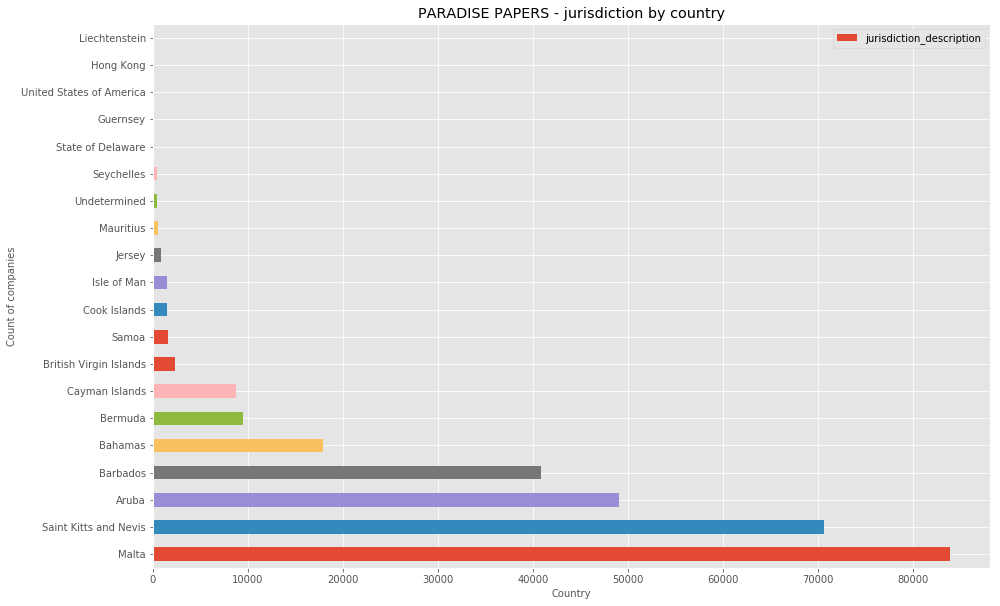

In [26]:
df1 = paradise_entity.jurisdiction_description.value_counts()
ax = df1[:20].plot(kind='barh', title ="PARADISE PAPERS - jurisdiction by country",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Country",fontsize=10)
ax.set_ylabel("Count of companies",fontsize=10)

In [27]:
paradise_subset = paradise_entity[[u'node_id', u'name', u'jurisdiction_description', u'countries']]
paradise_subset.head()
split = lambda x: pd.Series([i for i in reversed(x.split(';'))])
paradise_split = paradise_subset['countries'].dropna().apply(split)
paradise_split.rename(columns={0:'Country1',1:'Country2',2:'Country3', 3: 'Country4'},inplace=True)
paradise_split = paradise_split[['Country1', 'Country2', 'Country3', 'Country4']]
paradise_split[:5]
paradise_split.drop(['Country3', 'Country4'], axis = 1)
paradise_subset[['Country1', 'Country2']] = paradise_split[['Country1', 'Country2']]
paradise_subset = paradise_subset.drop('countries', axis = 1)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [28]:
source_country = paradise_subset[['Country1','Country2']]
rank_paradise = source_country.apply(pd.Series.value_counts).fillna(0)
rank_paradise
rank_paradise['total'] = rank_paradise.sum(axis = 1)
rank_paradise = rank_paradise.sort_values(by = 'total', ascending = False).total

Text(0,0.5,'Count of Companies in Country')

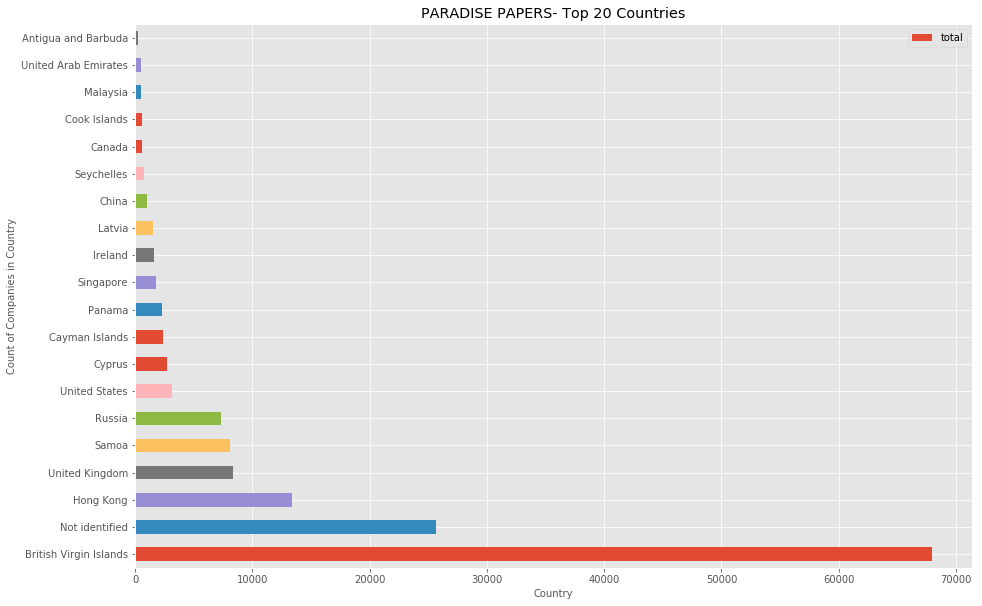

In [29]:
ax = top_20.plot(kind='barh', title ="PARADISE PAPERS- Top 20 Countries",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Country",fontsize=10)
ax.set_ylabel("Count of Companies in Country",fontsize=10)

Text(0,0.5,'Count of Relationship')

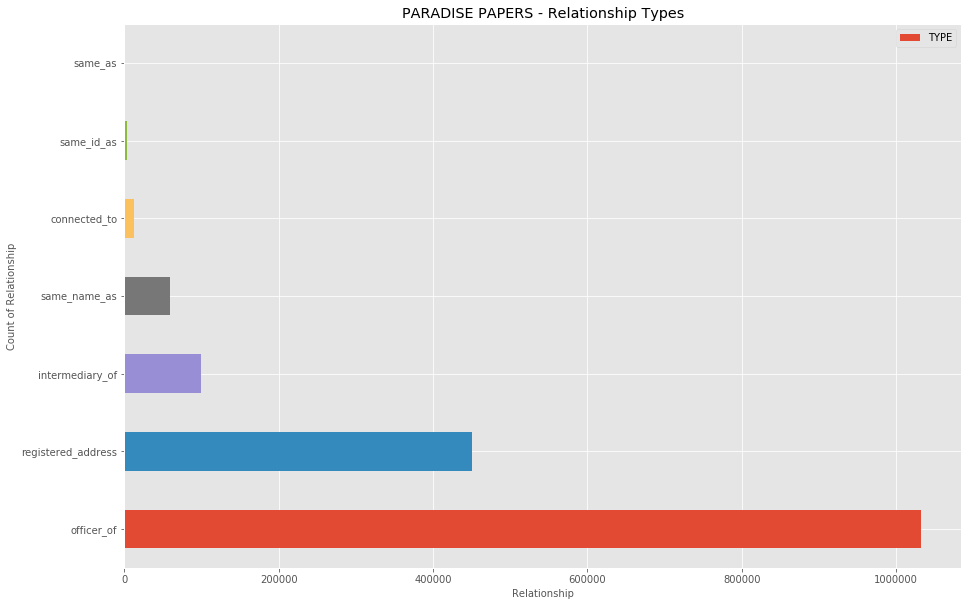

In [31]:
df2 = paradise_edges.TYPE.value_counts()
ax = df2.plot(kind='barh', title ="PARADISE PAPERS - Relationship Types",figsize=(15,10),legend=True, fontsize=10)
ax.set_xlabel("Relationship",fontsize=10)
ax.set_ylabel("Count of Relationship",fontsize=10)